In [1]:
## import the basic library functions which you want use 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns 
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Company_Data.csv')##read the file to perform the operation
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# performing the basic EDA

In [3]:
data.info()#gives the basic info of the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe() # gives various values of the buisness decesions  of the dataset

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.loc[data.Sales<=7.5,'sales']='bad'# here we are converting the sales <=7.5 as bad and above are good 
data.loc[data.Sales>=7.5,'sales']='good'
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,good
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,bad
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,good
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,bad
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,bad
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,bad


In [6]:
label=preprocessing.LabelEncoder()
data['ShelveLoc']=label.fit_transform(data.ShelveLoc)
data['Urban']=label.fit_transform(data.Urban)
data['US']=label.fit_transform(data.US)
data['sales']=label.fit_transform(data.sales)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [9]:
data.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
sales            2
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
 11  sales        400 non-null    int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 31.4 KB


(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

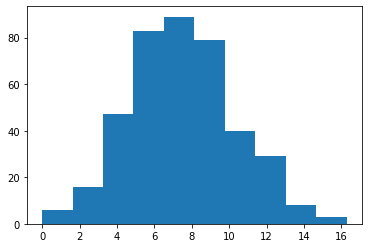

In [8]:
plt.hist(data.Sales)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='count'>

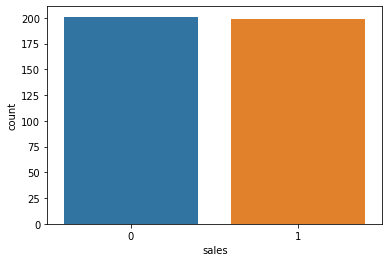

In [7]:
sns.countplot(data.sales)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

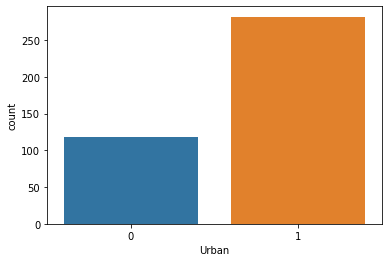

In [8]:
sns.countplot(data.Urban)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='US', ylabel='count'>

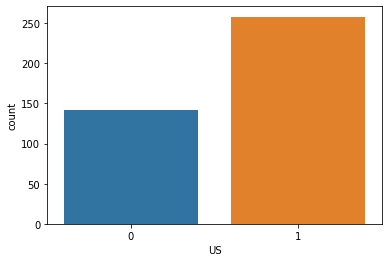

In [9]:
sns.countplot(data.US)

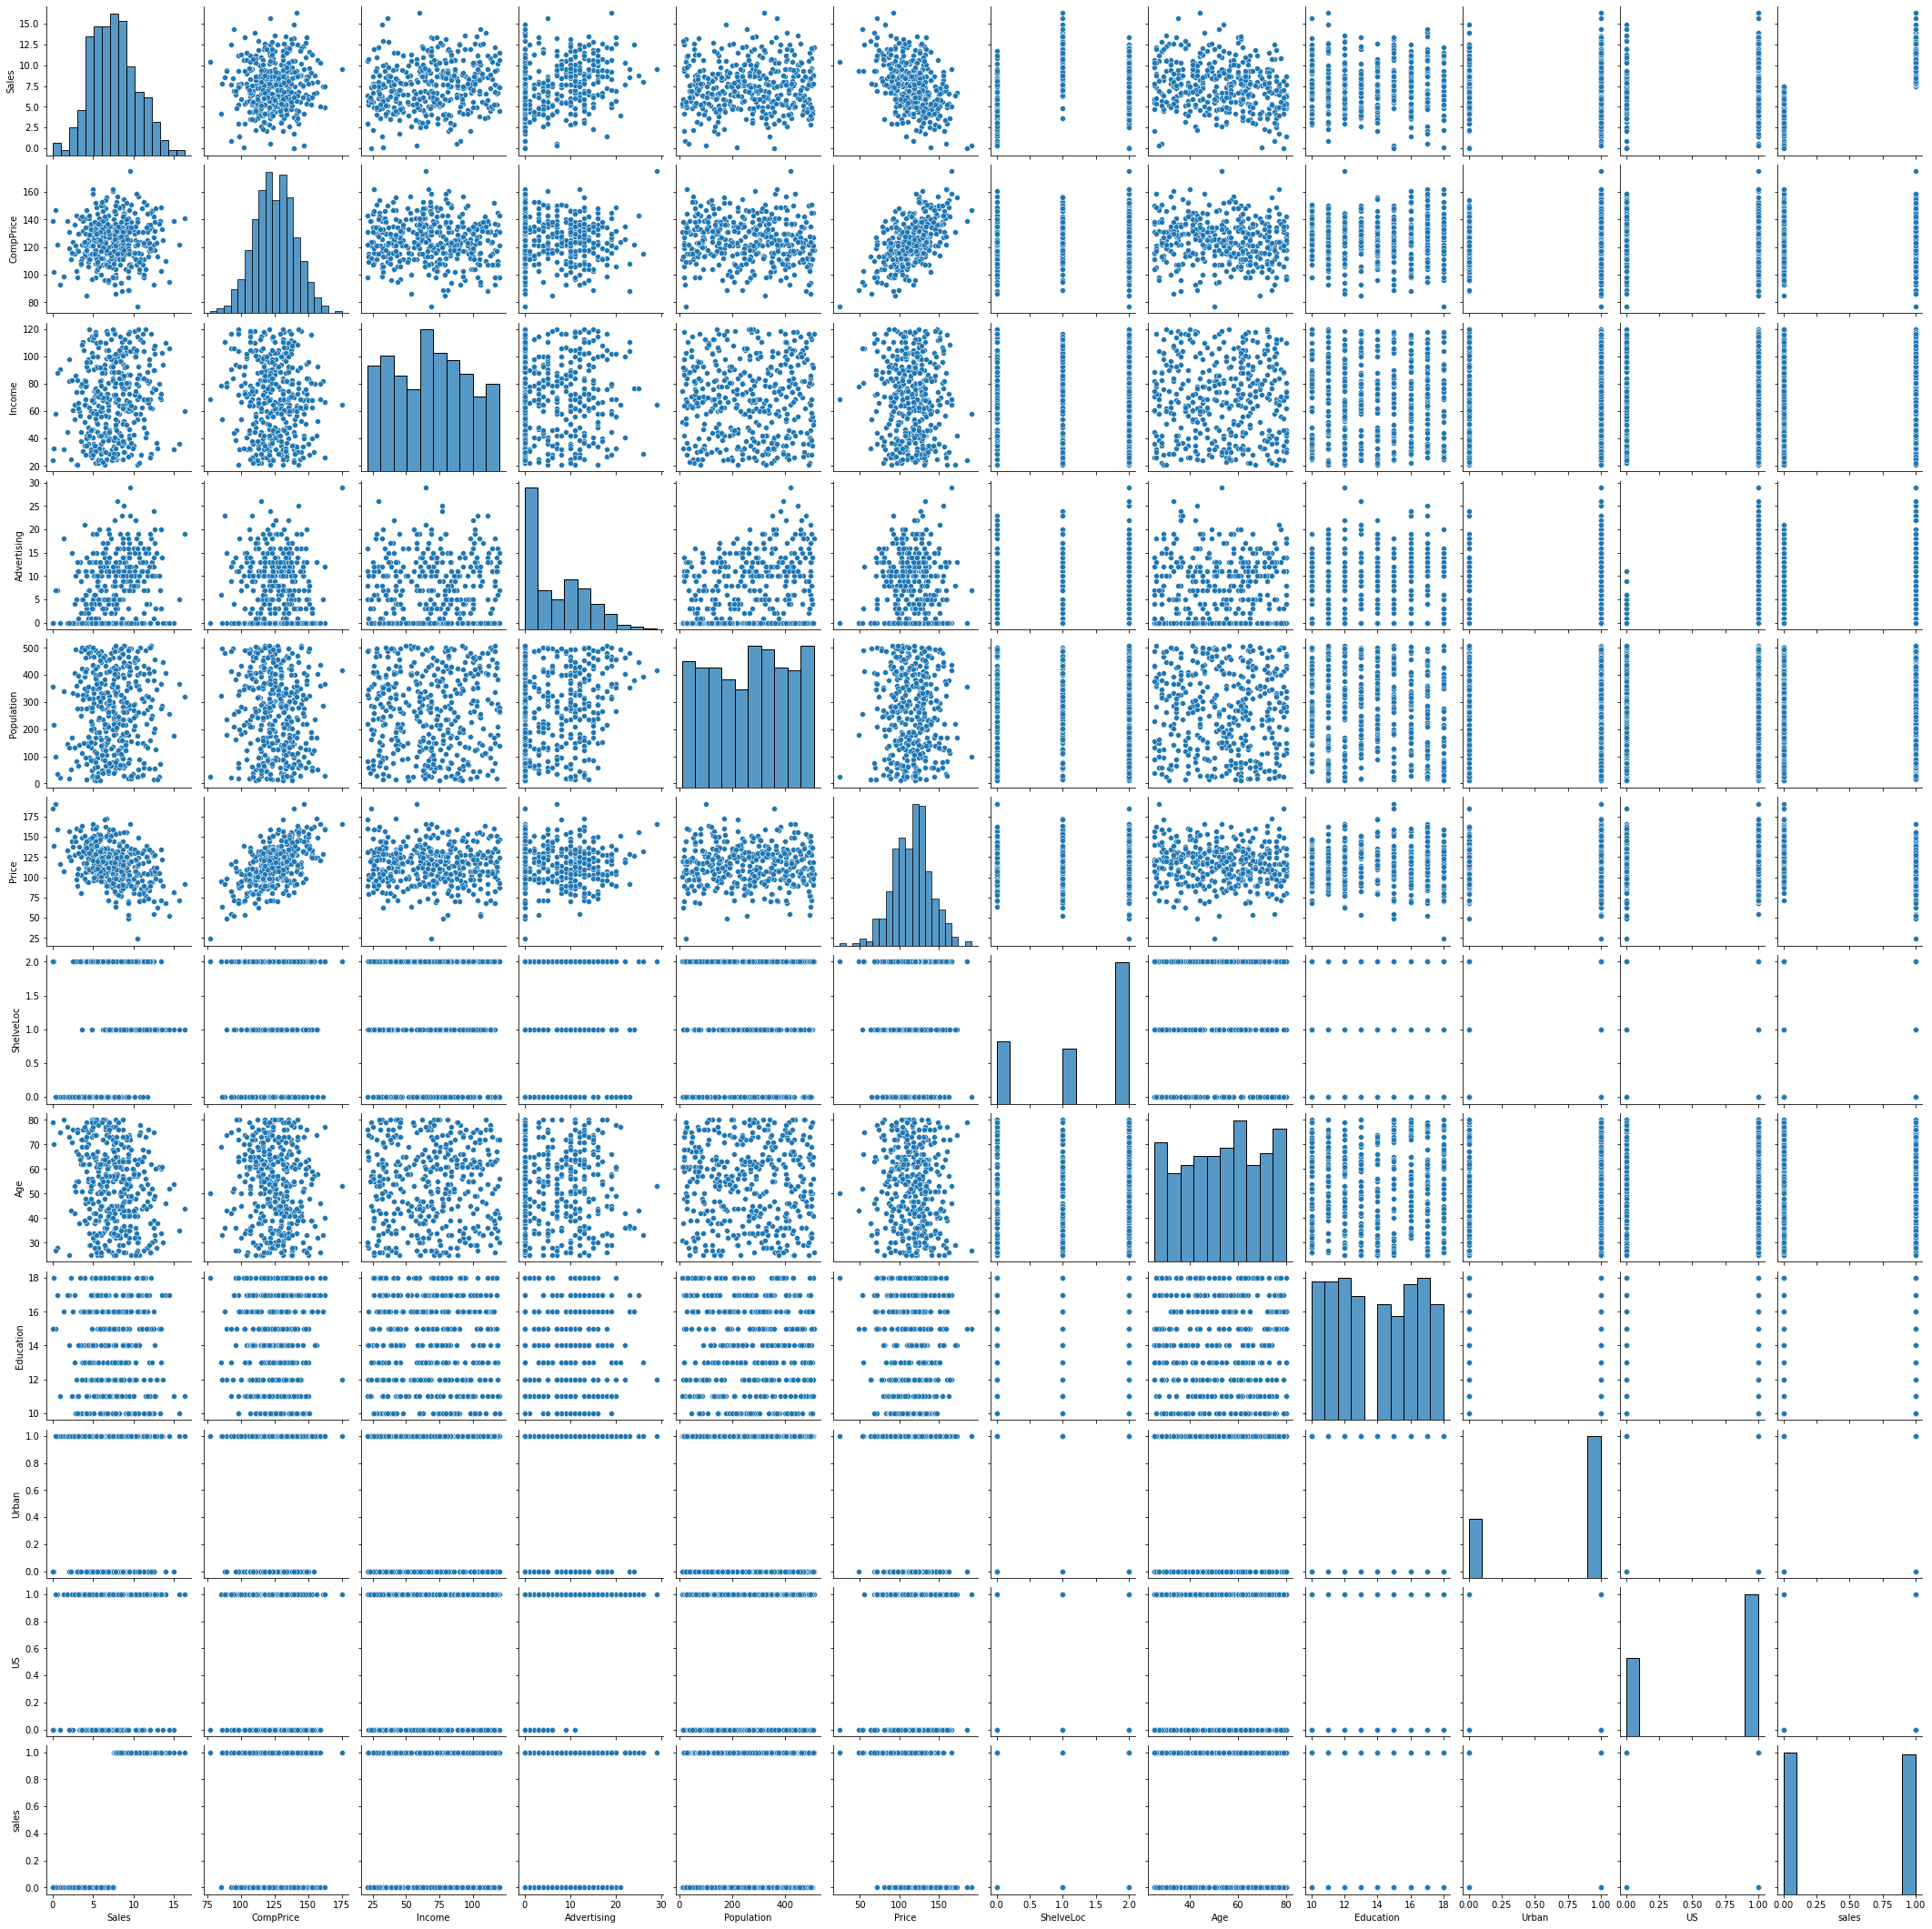

In [13]:
sns.pairplot(data)

In [23]:
x=data.iloc[:,1:11]
y=data.iloc[:,-1]

In [24]:
print(x)
print(y)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

# developing the model of Random Forest

In [25]:
num_trees=100
max_features=3 

In [26]:
kfold=KFold(n_splits=10,random_state=7)

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [27]:
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
model.fit(x,y)

RandomForestClassifier(max_features=3)

In [28]:
accuracy=cross_val_score(model,x,y,cv=kfold)
accuracy

array([0.775, 0.8  , 0.65 , 0.825, 0.775, 0.9  , 0.75 , 0.85 , 0.75 ,
       0.75 ])

(array([1., 0., 0., 0., 3., 2., 2., 1., 0., 1.]),
 array([0.65 , 0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 ,
        0.875, 0.9  ]),
 <BarContainer object of 10 artists>)

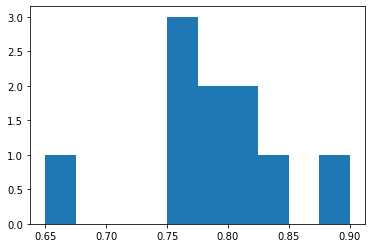

In [31]:
plt.hist(accuracy)

In [19]:
accuracy.mean()

NameError: name 'accuracy' is not defined

In [20]:
iv=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [32]:
feature_imp=model.feature_importances_
feature_imp

array([0.12848963, 0.10085792, 0.11366365, 0.0860555 , 0.26324345,
       0.11233104, 0.11900828, 0.05108782, 0.01266038, 0.01260232])

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

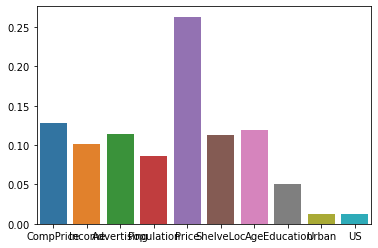

In [33]:
sns.barplot(iv,feature_imp)